## Kendrick Mass Defect Spectrum and van Krevlen plot

In [1]:
import matplotlib.pyplot as plt
from rdkit.Chem import MolFromSmiles
from rdkit.Chem.Descriptors import ExactMolWt
from rdkit.Chem.rdMolDescriptors import CalcMolFormula, GetAtomFeatures

I used the same definition of kendrick mass as in

Hughey, Christine A.; Hendrickson, Christopher L.; Rodgers, Ryan P.; Marshall, Alan G.; Qian, Kuangnan (2001). Kendrick Mass Defect Spectrum:  A Compact Visual Analysis for Ultrahigh-Resolution Broadband Mass Spectra. *Analytical Chemistry*, **73(19)**, 4676–4681. [doi:10.1021/ac010560w](https://doi.org/10.1021/ac010560w)

In [2]:
ch_2 = MolFromSmiles("[CH2]")
ch_2_mass = ExactMolWt(ch_2)
print(f'Mass of CH2: {ch_2_mass}')

Mass of CH2: 14.015650063999999


In [3]:
# factor to convert IUPAC mass to kendrick mass
conv_factor = 14.00000/ch_2_mass

In [4]:
gens_list = []
kendrick_wt_list = []
nominal_wt_list = []

# an item at index 'i' in each of the lists above corresponds to the same molecule

with open('../main/glucose/glucose_degradation_output.txt') as glu_out:
    contents = glu_out.readlines()
    for line in contents:
        comps = line.split("\t")
        gen_num = int(comps[0][1])
        mol = MolFromSmiles(comps[1])
        iupac_wt = ExactMolWt(mol)
        kendrick_wt = iupac_wt * conv_factor
        
        gens_list.append(gen_num)
        kendrick_wt_list.append(kendrick_wt)
        nominal_wt_list.append(round(kendrick_wt))

In [5]:
# another definition of KMD used in spectrometers involves multiplying by 1000 as a scaling factor
kendrick_wt_defects = [1000*(nominal_wt_list[i] - kendrick_wt_list[i]) for i in range(len(kendrick_wt_list))]

Now, let's actually plot Kendrick Mass (x-axis) vs kendrick mass defect

unique weights in gen 5: 138, total wts 40512
unique defects in gen 5: 49, total defs 40512
unique weights in gen 4: 97, total wts 6837
unique defects in gen 4: 37, total defs 6837
unique weights in gen 3: 54, total wts 926
unique defects in gen 3: 27, total defs 926
unique weights in gen 2: 21, total wts 110
unique defects in gen 2: 14, total defs 110
unique weights in gen 1: 6, total wts 16
unique defects in gen 1: 6, total defs 16


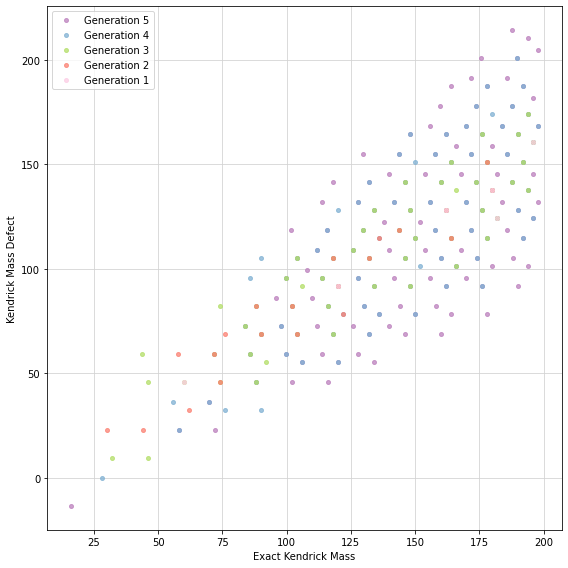

In [35]:
#colors_for_gen = ['red', 'gold', 'limegreen', 'royalblue', 'violet']
colors_for_gen = ['#FCCDE5', '#FB8072', '#B3DE68', '#80B1D3', '#BC80BD']
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)

for gen in range(max(gens_list), 0, -1):
    weights_list = [kendrick_wt_list[i] for i in range(len(kendrick_wt_list)) if gens_list[i] == gen]
    defects_list = [kendrick_wt_defects[i] for i in range(len(kendrick_wt_list)) if gens_list[i] == gen]
    unique_wts = list(set(weights_list))
    # KMD corresponding to each wt in unique_wts
    defects = []
    for wt in unique_wts:
        ind = weights_list.index(wt)
        defects.append(defects_list[ind])
    print(f'unique weights in gen {gen}: {len(set(weights_list))}, total wts {len(weights_list)}')
    print(f'unique defects in gen {gen}: {len(set(defects_list))}, total defs {len(weights_list)}')
    plt.plot(unique_wts, defects, color=f'{colors_for_gen[gen-1]}', marker='o',
                 linestyle='', markersize=4, label=f'Generation {gen}', alpha=0.75)#
ax.legend(loc='upper left')
#ax.set_facecolor('whitesmoke')
plt.xlabel('Exact Kendrick Mass')
plt.ylabel('Kendrick Mass Defect')
plt.grid(color='lightgray')
fig.tight_layout()
plt.savefig('kendrick_mass_defect.jpg', dpi=300)
plt.show()